In [26]:
import numpy as np 
import pandas as pd 
import sys
import time

In [27]:
review = pd.read_json("./data/review/review_ea", lines=True)

review.head()



,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,mb1F4jkmWzioTIXHFMmDQQ,xYlnzfQNOYpYga8vWIpnJw,e1WJ1qcgF2TBkoYzopeTgQ,5,0,0,0,Long waits typical for the small dive of a din...,2017-03-20 13:10:58
1,YpCUaIZOHL49g7aFFo8rnw,5flmantyW8kZdmPXNfiX9A,1Bu2qyqv4quJ9YvABY76PA,5,1,0,0,If you ask my friends how many times they've e...,2013-01-15 21:50:50
2,Ue2fecGoQyGc61x0nQx2Rw,HINlw23_50C3gmOEPlRmjA,DY4jLULHKBrjfKeO_H1Qgw,4,0,0,1,This hole in the wall has some of the best piz...,2015-12-30 19:58:11
3,QStibHGxYuSXv0KiWciUCw,vL4NVHcolckP-ETkAypPxw,cfTlwXhjfls-nWqLGfrbog,5,3,0,1,This is a GREAT thrift store. There are lots o...,2009-04-11 07:29:19
4,MVRlmv0d8OFZ22y2O81bXA,JVhTxsNFTXbLbMXUCbf-VQ,pWy12daEVhWnYBoQUblV2Q,5,0,0,0,Easily the best dog park in the area. There a...,2015-04-21 16:44:37


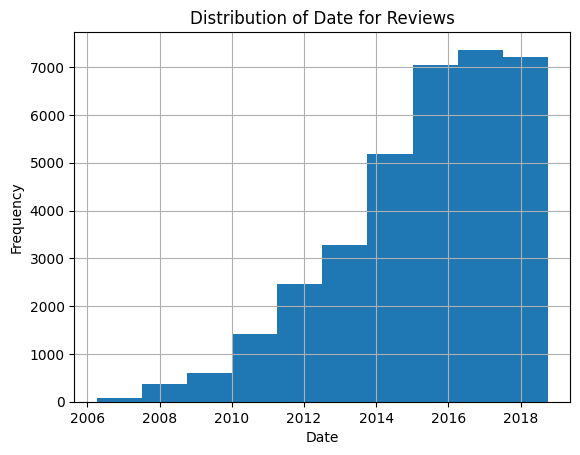

In [28]:
import matplotlib.pyplot as plt

review['date'].hist()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date for Reviews')
plt.show()


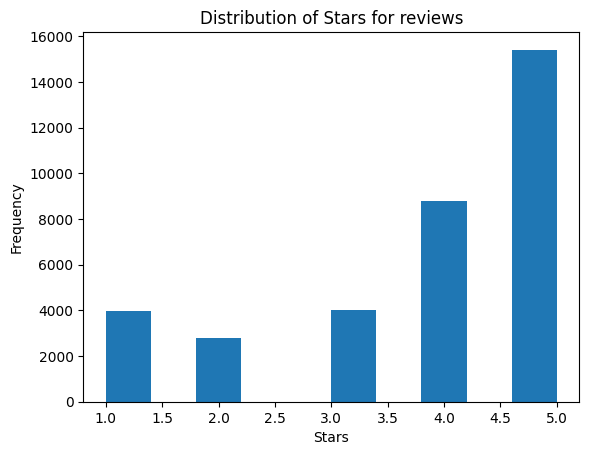

In [29]:
plt.hist(review['stars'])
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars for reviews')
plt.show()

In [30]:
user = pd.read_json("./data/user/user_ao", lines=True)

user.head()



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,VROJG5AjUJ_rdVPHUC7jcw,Jeffrey,3,2020-06-27 03:38:51,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1,ym2bnzz2KrrCpO8uEWd6fg,Nelson,1,2012-04-27 00:40:38,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
2,3IwrSW3zGRurv70OmW8ZCQ,Manny,37,2012-02-10 05:56:34,13,4,3,,None,0,...,0,0,0,0,0,1,0,0,0,0
3,uZUFWexyzG1ekERYgXq5XA,George,10,2015-12-19 04:59:56,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
4,CgmLY8ly7UHdvtzPcEuL_Q,Michelle,2,2013-01-11 17:51:58,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
num_rows = review.shape[0]
print(num_rows)


35000


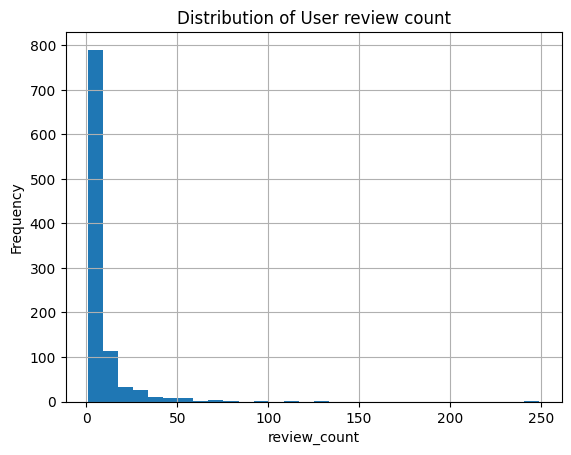

In [32]:
#select only 1000 values and plot the review_count

user[0:999]['review_count'].hist(bins=30)
plt.xlabel('review_count')
plt.ylabel('Frequency')
plt.title('Distribution of User review count')
plt.show()


